First 5 rows:
   Invoice ID Branch       City Customer type  Gender            Product line  \
0   INV-1000      B   Mandalay        Normal    Male       Health and beauty   
1   INV-1001      B   Mandalay        Normal  Female       Health and beauty   
2   INV-1002      C  Naypyitaw        Normal    Male      Home and lifestyle   
3   INV-1003      C  Naypyitaw        Member    Male  Electronic accessories   
4   INV-1004      C  Naypyitaw        Normal  Female  Electronic accessories   

   Unit price  Quantity  Tax 5%   Total        Date   Time      Payment  \
0       43.71         8   17.48  367.16  03/02/2019  14:38  Credit card   
1       19.00         8    7.60  159.60  01/24/2019  12:21      Ewallet   
2       74.98         6   22.49  472.37  01/02/2019  14:32  Credit card   
3       57.23         9   25.75  540.82  02/18/2019  20:58      Ewallet   
4       14.20         3    2.13   44.73  02/24/2019  13:56      Ewallet   

   Rating  
0     6.7  
1     4.3  
2     5.8  
3    

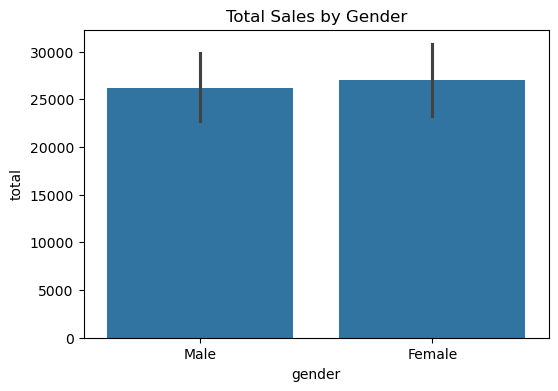

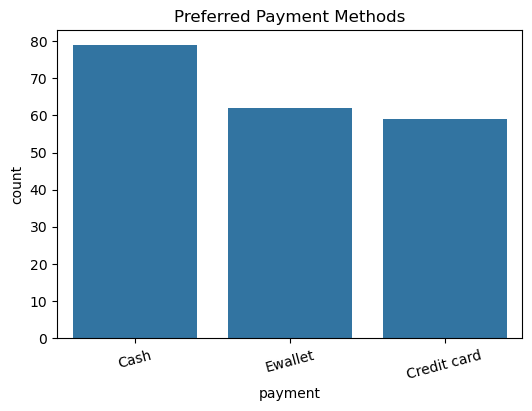

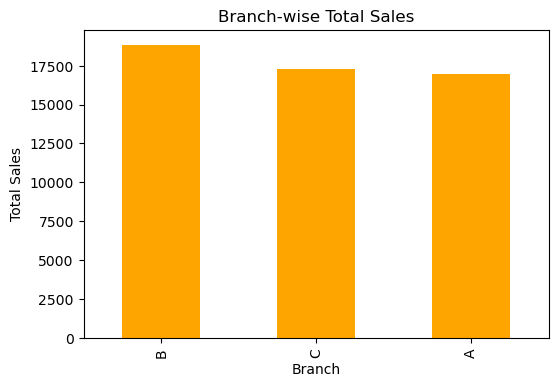

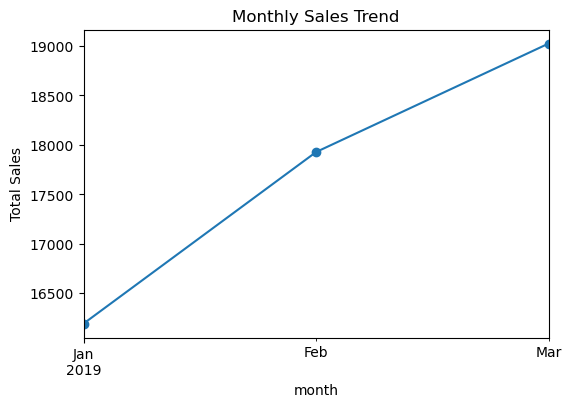

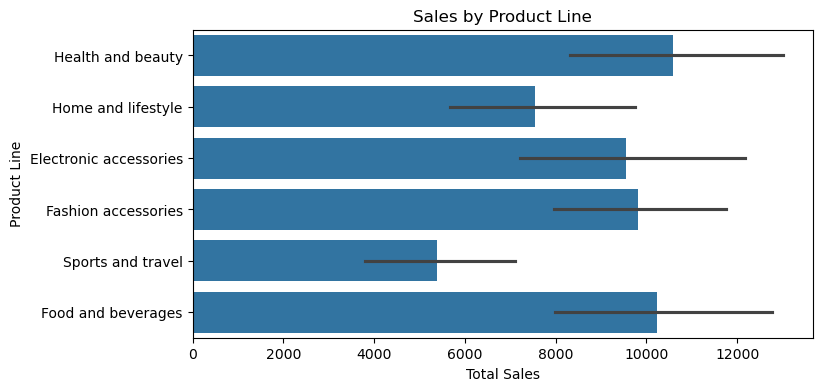

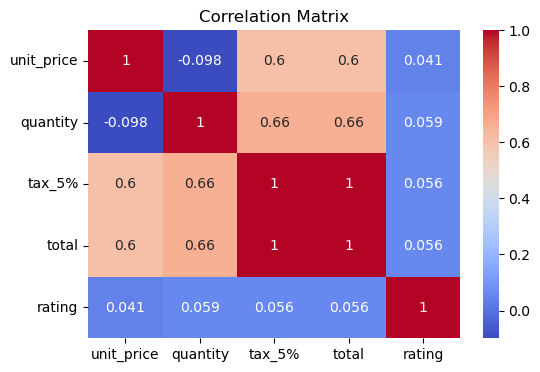

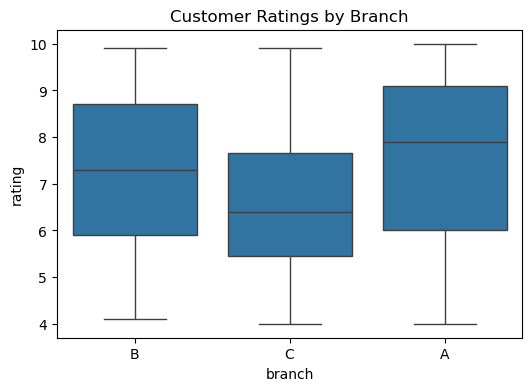

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv(r'C:\Users\Administrator\Downloads\supermarket_sales.csv')

# Basic Exploration
print("First 5 rows:\n", df.head())
print("\nInfo:\n")
df.info()
print("\nMissing Values:\n", df.isnull().sum())

# Rename columns 
df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]

# Data Cleaning
df['date'] = pd.to_datetime(df['date'])

# Basic KPIs
print("\nTotal Revenue:", df['total'].sum())
print("Average Rating:", df['rating'].mean())

# Total Sales by Gender
plt.figure(figsize=(6,4))
sns.barplot(x='gender', y='total', data=df, estimator=sum)
plt.title('Total Sales by Gender')
plt.show()

# Payment Method Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='payment', order=df['payment'].value_counts().index)
plt.title('Preferred Payment Methods')
plt.xticks(rotation=15)
plt.show()

# Sales by Branch
branch_sales = df.groupby('branch')['total'].sum().sort_values(ascending=False)
branch_sales.plot(kind='bar', title='Branch-wise Total Sales', ylabel='Total Sales', xlabel='Branch', figsize=(6,4), color='orange')
plt.show()

# Monthly Sales Trend
df['month'] = df['date'].dt.to_period('M')
monthly_sales = df.groupby('month')['total'].sum()
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend', figsize=(6,4))
plt.ylabel('Total Sales')
plt.show()

# Sales by Product Line
plt.figure(figsize=(8,4))
sns.barplot(y='product_line', x='total', data=df, estimator=sum)
plt.title('Sales by Product Line')
plt.xlabel('Total Sales')
plt.ylabel('Product Line')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Average Rating by Branch
plt.figure(figsize=(6,4))
sns.boxplot(x='branch', y='rating', data=df)
plt.title('Customer Ratings by Branch')
plt.show()
